In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
#from transformers import TFAutoModel
from sklearn import preprocessing

In [2]:
df = pd.read_csv('../capstone/datasets/input_data_after_data_for_dl__with_augmentation_knn_round2.csv')

In [3]:
df.head()

,Unnamed: 0,Combined Description Cleaned,Assignment group
0,0,login issue user manager name checked the name...,GRP_0
1,1,outlook received from hello team my are not in...,GRP_0
2,2,cannot log in to received from hi i cannot on ...,GRP_0
3,3,unable to access tool page,GRP_0
4,4,error,GRP_0


In [4]:
len(df)

31159

In [5]:
seqlen = df['Combined Description Cleaned'].apply(lambda x:len(x.split()))

In [6]:
#seqlen

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Combined Description Cleaned', ylabel='Density'>

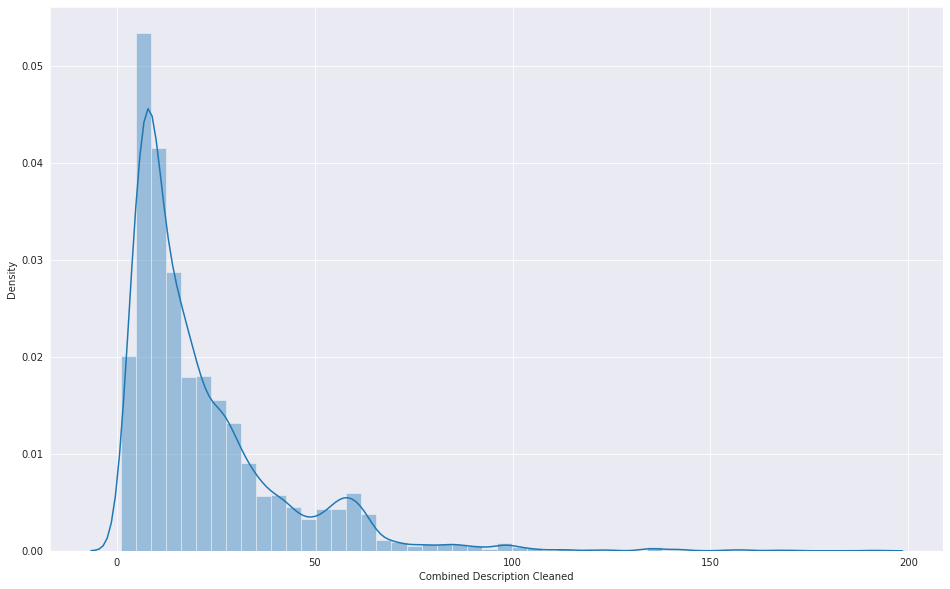

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(seqlen)

In [9]:
SEQ_LEN=100

In [10]:
from transformers import (TFBertModel, BertTokenizer,
                         TFGPT2Model, GPT2Tokenizer)

#bert_model = TFBertModel.from_pretrained("bert-base-cased")  # Automatically loads the config
#bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

gpt2_model = TFGPT2Model.from_pretrained("gpt2")  # Automatically loads the config
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

All model checkpoint layers were used when initializing TFGPT2Model.

All the layers of TFGPT2Model were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [11]:
#from transformers import AutoTokenizer

In [12]:
#tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [13]:
#gpt2_tokenizer.add_special_tokens({'pad_token': [0]})
#gpt2_tokenizer.pad_token = 0
#gpt2_tokenizer.pad_token = "[PAD]"
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token
tokens = gpt2_tokenizer.encode_plus("hello world", max_length=SEQ_LEN,truncation=True, padding="max_length",
                              add_special_tokens=True, return_token_type_ids=False,
                              return_attention_mask=True, return_tensors='tf')

In [14]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 100), dtype=int32, numpy=
array([[31373,   995, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 100), dtype=int32, numpy=
array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
Xids = np.zeros((len(df),SEQ_LEN))
Xmask = np.zeros((len(df),SEQ_LEN))

In [16]:
Xids.shape

(31159, 100)

In [17]:
Xmask.shape

(31159, 100)

In [18]:
 gpt2_tokenizer.add_special_tokens({'pad_token': '[0]'})
for i,sequence in enumerate(df['Combined Description Cleaned']):
    tokens = gpt2_tokenizer.encode_plus(sequence, max_length=SEQ_LEN,truncation=True, padding="max_length",
                              add_special_tokens=True, return_token_type_ids=False,
                              return_attention_mask=True, return_tensors='tf')
    Xids[i,:], Xmask[i,:] = tokens['input_ids'],tokens['attention_mask']

In [19]:
Xids.shape

(31159, 100)

In [20]:
Xmask.shape

(31159, 100)

In [21]:
df['Assignment group'].unique

<bound method Series.unique of 0         GRP_0
1         GRP_0
2         GRP_0
3         GRP_0
4         GRP_0
          ...  
31154     GRP_8
31155     GRP_8
31156    GRP_25
31157    GRP_25
31158    GRP_25
Name: Assignment group, Length: 31159, dtype: object>

In [22]:
#df2 = df
#le = preprocessing.LabelEncoder()
#df2["Assignment group by number"] = le.fit_transform(df["Assignment group"])
#y_classes_len = len(le.classes_)
#print(le.classes_)
#print(y_classes_len)
#df2["Assignment group by number"]

In [23]:
df2 = df
df['Assignment group by number'] = df['Assignment group'].str[4:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31159 entries, 0 to 31158
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    31159 non-null  int64 
 1   Combined Description Cleaned  31159 non-null  object
 2   Assignment group              31159 non-null  object
 3   Assignment group by number    31159 non-null  object
dtypes: int64(1), object(3)
memory usage: 973.8+ KB


In [24]:
df

,Unnamed: 0,Combined Description Cleaned,Assignment group,Assignment group by number
0,0,login issue user manager name checked the name...,GRP_0,0
1,1,outlook received from hello team my are not in...,GRP_0,0
2,2,cannot log in to received from hi i cannot on ...,GRP_0,0
3,3,unable to access tool page,GRP_0,0
4,4,error,GRP_0,0
...,...,...,...,...
31154,14761,job eu tool notch in job regular at sent from,GRP_8,8
31155,14762,job eu tool notch place job regular at receive...,GRP_8,8
31156,14763,multiple login received from hello is with the...,GRP_25,25
31157,14764,multiple login received from hello is with the...,GRP_25,25


In [25]:
arr = df['Assignment group by number'].values
arr.size

31159

In [26]:
labels = tf.keras.utils.to_categorical(df['Assignment group by number'])

In [27]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
with open('datasets/xids.npy', 'wb') as f:
    np.save(f,Xids)
with open('datasets/xmask.npy', 'wb') as f:
    np.save(f,Xmask)
with open('datasets/labels.npy', 'wb') as f:
    np.save(f,labels)
del df, Xids, Xmask, labels

In [29]:
with open('datasets/xids.npy', 'rb') as f:
    Xids = np.load(f)
with open('datasets/xmask.npy', 'rb') as f:
    Xmask = np.load(f)
with open('datasets/labels.npy', 'rb') as f:
    labels = np.load(f)

In [30]:
Xids

array([[38235.,  2071.,  2836., ..., 50257., 50257., 50257.],
       [  448.,  5460.,  2722., ..., 50257., 50257., 50257.],
       [   66., 34574.,  2604., ..., 50257., 50257., 50257.],
       ...,
       [48101., 17594.,  2722., ..., 50257., 50257., 50257.],
       [48101., 17594.,  2722., ..., 50257., 50257., 50257.],
       [48101., 17594.,  2722., ..., 50257., 50257., 50257.]])

In [31]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [33]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [34]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([38235.,  2071.,  2836.,  4706.,  1438., 10667.,   262.,  1438.,
         287.,   512.,   290., 13259.,  9206., 13030.,   284.,  2198.,
       24955.,  4999.,   326.,   339.,   373.,  1498., 17594.,  2071.,
       12939., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257.])>, <tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.

In [35]:
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

In [36]:
dataset = dataset.map(map_func)

In [37]:
for i in dataset.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(100,), dtype=float64, numpy=
array([38235.,  2071.,  2836.,  4706.,  1438., 10667.,   262.,  1438.,
         287.,   512.,   290., 13259.,  9206., 13030.,   284.,  2198.,
       24955.,  4999.,   326.,   339.,   373.,  1498., 17594.,  2071.,
       12939., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257., 50257., 50257., 50257., 50257.,
       50257., 50257., 50257., 50257.])>, 'attention_mask': <tf.Tensor: shape=(100,),

In [38]:
dataset = dataset.shuffle(100000).batch(32)

In [39]:
DS_LEN = len(list(dataset))

In [40]:
DS_LEN

974

In [41]:
SPLIT=0.9
train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))
del dataset

In [42]:
#bert =  TFAutoModel.from_pretrained('bert-base-cased')

In [43]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask',dtype='int32')
embeddings = gpt2_model(input_ids, attention_mask=mask)[0]
X= tf.keras.layers.GlobalMaxPool1D()(embeddings)
X= tf.keras.layers.BatchNormalization()(X)
X= tf.keras.layers.Dense(128, activation='relu')(X)
X= tf.keras.layers.Dropout(0.1)(X)
X= tf.keras.layers.Dense(32, activation='relu')(X)
y= tf.keras.layers.Dense(74,activation='softmax', name='outputs')(X)
model = tf.keras.Model(inputs=[input_ids, mask],outputs=y)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [44]:

model.layers[2].trainable=False
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
tfgp_t2model (TFGPT2Model)      TFBaseModelOutputWit 124439808   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 768)          0           tfgp_t2model[0][0]           

In [45]:
optimizer = tf.keras.optimizers.RMSprop()
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [46]:
model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [47]:
history = model.fit(train, validation_data=val, epochs=100, verbose=1)

Epoch 1/100
877/877 [==============================] - 52s 52ms/step - loss: 2.9505 - accuracy: 0.2772 - val_loss: 2.0812 - val_accuracy: 0.4588
Epoch 2/100
877/877 [==============================] - 45s 52ms/step - loss: 2.0031 - accuracy: 0.4636 - val_loss: 1.6426 - val_accuracy: 0.5674
Epoch 3/100
877/877 [==============================] - 46s 52ms/step - loss: 1.7462 - accuracy: 0.5254 - val_loss: 1.3723 - val_accuracy: 0.6291
Epoch 4/100
877/877 [==============================] - 46s 52ms/step - loss: 1.5860 - accuracy: 0.5566 - val_loss: 1.2845 - val_accuracy: 0.6498
Epoch 5/100
877/877 [==============================] - 47s 54ms/step - loss: 1.4522 - accuracy: 0.5926 - val_loss: 1.1448 - val_accuracy: 0.6943
Epoch 6/100
877/877 [==============================] - 48s 55ms/step - loss: 1.3712 - accuracy: 0.6065 - val_loss: 1.1717 - val_accuracy: 0.6966
Epoch 7/100
877/877 [==============================] - 49s 56ms/step - loss: 1.3174 - accuracy: 0.6276 - val_loss: 1.0518 - val_ac

877/877 [==============================] - 45s 51ms/step - loss: 1.0301 - accuracy: 0.7158 - val_loss: 0.8380 - val_accuracy: 0.8281
Epoch 58/100
877/877 [==============================] - 46s 52ms/step - loss: 1.0537 - accuracy: 0.7193 - val_loss: 1.0880 - val_accuracy: 0.8142
Epoch 59/100
877/877 [==============================] - 45s 52ms/step - loss: 1.0529 - accuracy: 0.7128 - val_loss: 1.0013 - val_accuracy: 0.8174
Epoch 60/100
877/877 [==============================] - 45s 52ms/step - loss: 1.0336 - accuracy: 0.7150 - val_loss: 0.8745 - val_accuracy: 0.8291
Epoch 61/100
877/877 [==============================] - 45s 52ms/step - loss: 1.0574 - accuracy: 0.7069 - val_loss: 0.8380 - val_accuracy: 0.8258
Epoch 62/100
877/877 [==============================] - 45s 52ms/step - loss: 1.0584 - accuracy: 0.7153 - val_loss: 1.1196 - val_accuracy: 0.8078
Epoch 63/100
877/877 [==============================] - 45s 52ms/step - loss: 1.0220 - accuracy: 0.7198 - val_loss: 0.9118 - val_accuracy

In [70]:
def get_evaluation_accuracy(model, val):
    """Test model classification accuracy"""
    eval_loss, eval_acc = model.evaluate(val, verbose=0)
    print('Evaluation Accuracy: {acc:0.3f}'.format(acc=eval_acc))
    print('Evaluation Loss: {acc:0.3f}'.format(acc=eval_loss))

    
#Function to plot accuracy
def plot_accuracy(history):
  try:
      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_accuracy'])
  except KeyError:
      plt.plot(history.history['acc'])
      plt.plot(history.history['val_acc'])
  plt.title('Accuracy vs. epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='lower right')
  plt.show() 

#Function to plot loss
def plot_loss(history, scale=1):
  try:
      plt.plot(history.history['loss'])
      plt.plot( [x / scale for x in history.history['val_loss']] )
  except KeyError:
      plt.plot(history.history['loss'])
      plt.plot([x / scale for x in history.history['val_loss']] )
  plt.title('Loss vs. epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show() 

def plot_to_image(figure):
  """Converts the matplotlib plot specified by 'figure' to a PNG image and
  returns it. The supplied figure is closed and inaccessible after this call."""
  # Save the plot to a PNG in memory.
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  # Closing the figure prevents it from being displayed directly inside
  # the notebook.
  plt.close(figure)
  buf.seek(0)
  # Convert PNG buffer to TF image
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  # Add the batch dimension
  image = tf.expand_dims(image, 0)
  return image

#Function to plot the confusion matrix that will be called at the end of each epoch
#The confusion matrix will be visible in the Tensor Board  
class_names=['0','1','2','3','4','5','6','7','8','9']
def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Normalize the confusion matrix.
  cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model1.predict(test_images)
  test_pred = np.argmax(test_pred_raw, axis=1)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

def print_values(history):
  print("Mean Accuracy for the validation dataset: ")
  print(np.array(history.history['val_accuracy']).mean())
  print("Mean Loss for the validation dataset: ")
  print(np.array(history.history['val_loss']).mean())
  print("Mean Accuracy for the training dataset: ")
  print(np.array(history.history['accuracy']).mean())
  print("Mean Loss for the training dataset: ")
  print(np.array(history.history['loss']).mean())

def print_results(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_train_pred = model.predict(X_train)
    y_train_pred = np.argmax(y_train_pred, axis=1)
    
    print('Prediction Model:', model)
    print('-'*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('-'*80)
    #print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    cm = confusion_matrix(y_test, y_pred)
    
    
    cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(20,10))  
    sns.heatmap(cm_df, annot=True)
    print('-'*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))

def print_scores(model,val):
    y_pred = model.predict(val)
    y_pred = np.argmax(y_pred, axis=1)
    precision = precision_score(val, y_pred, average='weighted')
    print('Precision: %f' % precision)
    recall = recall_score(val, y_pred, average='weighted')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(val, y_pred, average='weighted')
    print('F1 score: %f' % f1)
    print('-'*80)

    
def print_classification_report(model,val):
    y_pred = model.predict(val)
    y_pred = np.argmax(y_pred, axis=1)
    print('Classification report:\n %s' % (classification_report(val, y_pred)))

    
def print_confusion_matrix(model,X_test,y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred)  
    cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(20,10))  
    sns.heatmap(cm_df, annot=True)
    
def reduce_learning_rate_on_plateaue(patience=3,monitor='val_loss',mode='min'):
    #reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, factor=0.3, patience=patience,
    #                                                 mode=mode, verbose=1)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, 
                                  factor=0.1, 
                                  patience=10, 
                                  verbose=1, 
                                  mode=mode, 
                                  min_delta=0.0001, 
                                  cooldown=5, 
                                  min_lr=1e-6)
    return reduce_lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-3 * 10**(epoch / 10))

class lr_print_cb(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        #decay = self.model.optimizer.decay
        #iterations = self.model.optimizer.iterations
        #lr_with_decay = lr / (1. + decay * K.cast(iterations, K.dtype(decay)))
        print("Learning Rate = ", lr)
        
print_lr = lr_print_cb()

# Print the classification accuracy metrics

In [73]:
def build_model2(hp):
    input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
    mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask',dtype='int32')
    X = gpt2_model(input_ids, attention_mask=mask)[0]
    X= tf.keras.layers.GlobalMaxPool1D()(X)
    X= tf.keras.layers.BatchNormalization()(X)
    X= tf.keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=512, step=16),
        activation='relu')(X)
    X = tf.keras.layers.Dropout(
                hp.Choice('dropout_1', values = [0.1,0.2,0.3,0.4,0.5]),
            ) (X)
    X= tf.keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=32, max_value=512, step=16),
        activation='relu')(X)
    y= tf.keras.layers.Dense(74,activation='softmax', name='outputs')(X)
    model = tf.keras.Model(inputs=[input_ids, mask],outputs=y)    
    optimizer=tf.keras.optimizers.RMSprop(hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]),
                                      hp.Choice('momentum', values=[0.0, 0.2, 0.4, 0.6, 0.8, 0.9]))
    model.compile(optimizer=optimizer,
                loss = 'categorical_crossentropy',
                metrics=['accuracy']
                )
    model.layers[2].trainable=False
    model.summary()
    return model

def build_model(hp):
    #word_index, embeddings_matrix, nclasses = get_params()
    input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
    mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask',dtype='int32')
    X = gpt2_model(input_ids, attention_mask=mask)[0]
    #model = Sequential()
    hidden_layer = 6
    #gru_node = 32
    dropout=0.2
    #HP_DROPOUT = hp2.HParam('dropout', hp2.RealInterval(0.1, 0.2))

    #model.add(Embedding(len(word_index) + 1,
    #                            EMBEDDING_DIM,
    #                            weights=[embedding_matrix],
    #                            input_length=MAX_SEQUENCE_LENGTH,
    #                            trainable=True))
    #print(gru_node)
    for i in range(0,hidden_layer):
        X = tf.keras.layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(
            units=hp.Int('lstm_node_1_units', min_value=16, max_value=256, step=16),
            #units=hp.Choice('lstm_node_1_units', values = [32,128,256]),
           return_sequences=True
        ))(X)
        X = Dropout(
                hp.Choice('dropout_1', values = [0.1,0.2,0.3,0.4,0.5]),
            ) (X)
        X = BatchNormalization()(X)
    X = tf.keras.layers.Bidirectional(
        #tf.compat.v1.keras.layers.CuDNNGRU(gru_node)
        tf.compat.v1.keras.layers.CuDNNLSTM(
        units=hp.Int('lstm_node_2_units', min_value=16, max_value=256, step=16)
            #units=hp.Choice('lstm_node_2_units', values = [32,128,256])
    ))(X)
    X = Dropout(
                hp.Choice('dropout_2', values = [0.1,0.2,0.3,0.4,0.5]),   
        )(X)
    X=BatchNormalization()(X)
    X=Dense(units=hp.Int('dense_1_units', min_value=32, max_value=512, step=16),
              #units=hp.Choice('dense_1_units', values = [32,128,256]),
        activation='relu'
    )(X)
    X=BatchNormalization()(X)
    X= tf.keras.layers.Dense(32, activation='relu')(X)
    y= tf.keras.layers.Dense(74,activation='softmax', name='outputs')(X)
    model = tf.keras.Model(inputs=[input_ids, mask],outputs=y)
    #lr = hp.Choice('learning_rate', values=[0.001, 1e-2, 1e-3, 1e-4])
    #momentum = hp.Choice('momentum', values=[0.0, 0.2, 0.4, 0.6, 0.8, 0.9])
    optimizer=tf.keras.optimizers.RMSprop(hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]),
                                      hp.Choice('momentum', values=[0.0, 0.2, 0.4, 0.6, 0.8, 0.9]))
    model.compile(optimizer=optimizer,
                loss = 'categorical_crossentropy',
                metrics=['accuracy']
                )
    model.layers[2].trainable=False
    model.summary()
    return model

In [50]:
get_evaluation_accuracy(model,val)

Evaluation Accuracy: 0.814
Evaluation Loss: 1.271


In [51]:
print_values(history)

Mean Accuracy for the validation dataset: 
0.7966688188910485
Mean Loss for the validation dataset: 
1.00599816262722
Mean Accuracy for the training dataset: 
0.6913536873459816
Mean Loss for the training dataset: 
1.114402573108673


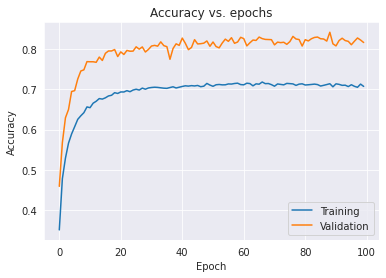

In [52]:
plot_accuracy(history)

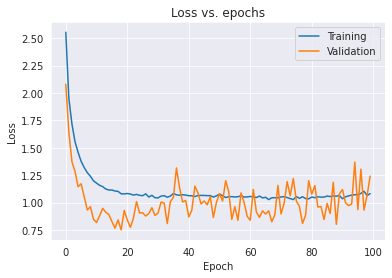

In [53]:
plot_loss(history)

In [ ]:
%%script false --no-raise-error
from kerastuner import RandomSearch
from kerastuner.engine import hyperparameters
from tensorflow.keras.layers import Input, Dropout, BatchNormalization, Dense
#%%script false --no-raise-error
tuner_search = RandomSearch(build_model2,
                            objective='val_accuracy',
                            max_trials=10, 
                            directory='outputs_gpt2', 
                            project_name='TicketAssignment'
                            )

In [ ]:
%%script false --no-raise-error
#logs_dir="logs_model_CNN"
#run_logdir = get_run_logdir(root_logdir=logs_dir) # e.g., './my_logs/' + run_id
#tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
#checkpoint_best_only = get_checkpoint_best_only()
#early_stopping = get_early_stopping(monitor='val_loss', mode='min',patience=10)
#reduce_lr = reduce_learning_rate_on_plateaue(monitor='val_loss', mode='min', patience=10)

tuner_search.search(train, validation_data=val,epochs=10,
                   verbose=1
#                   callbacks=[#tensorboard_cb,
#                            #PrintValTrainRatioCallback(),
#                            #checkpoint_every_epoch,
#                            #checkpoint_best_only,
#                            print_lr,
#                            reduce_lr , early_stopping
                    #]
                   )

#history = run_dl_model(model_GRU, X_train_Glove, X_test_Glove, y_train, y_test,
#                   epochs=3, batch_size=32,logs_dir="logs_model_CNN")#    with tf.device("/gpu:0"): 
#        history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=epochs, batch_size=batch_size,verbose=1,
#                            callbacks=[tensorboard_cb, PrintValTrainRatioCallback(),
#                            #checkpoint_every_epoch,
#                            checkpoint_best_only,
#                            reduce_lr , early_stopping
#                            ])

In [ ]:
%%script false --no-raise-error
hyperparams = tuner_search.get_best_hyperparameters(num_trials = 5)[0]
hyperparams

In [ ]:
%%script false --no-raise-error
best_model = tuner_search.get_best_models(num_models=1)[0]
loss, mse = best_model.evaluate(val)

In [ ]:
%%script false --no-raise-error
history = best_model.fit(train, validation_data=val,epochs=100,
                   verbose=1)  

In [ ]:
%%script false --no-raise-error
history = best_model.fit(train, validation_data=val,epochs=25,
                   verbose=1)  

In [ ]:
%%script false --no-raise-error
get_evaluation_accuracy(best_model, X_test_Glove, y_test)

In [57]:
from kerastuner.engine import hyperparameters
import kerastuner as kt
class MyTuner(kt.tuners.BayesianOptimization):
  def run_trial(self, trial, *args, **kwargs):
    # You can add additional HyperParameters for preprocessing and custom training loops
    # via overriding `run_trial`
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 16, 256, step=32)
    kwargs['epochs'] = trial.hyperparameters.Int('epochs', 5, 10)
    super(MyTuner, self).run_trial(trial, *args, **kwargs)

In [79]:
### tuner_bo = kt.tuners.BayesianOptimization(
tuner_bo = MyTuner(
            build_model2,
            objective='val_accuracy',
            max_trials=10,
            seed=42,
            executions_per_trial=1,
            directory='tuner_bo_outputs2', 
            project_name='TicketAssignment'
        )
#tuner_bo.search(X_train_Glove, y_train, epochs=4, validation_split=0.2, verbose=1)
#checkpoint_best_only = get_checkpoint_best_only()
#early_stopping = get_early_stopping(monitor='val_loss', mode='min',patience=10)
reduce_lr = reduce_learning_rate_on_plateaue(monitor='val_loss', mode='min', patience=10)
tuner_bo.search(train, validation_data=val,
                   verbose=1,
                   callbacks=[#tensorboard_cb,
                            #PrintValTrainRatioCallback(),
                            #checkpoint_every_epoch,
                            #checkpoint_best_only,
                            print_lr,
                            reduce_lr
                       #, early_stopping
                            ])
best_model = tuner_bo.get_best_models(num_models=1)[0]
best_model.evaluate(val)

Trial 9 Complete [00h 05m 14s]
val_accuracy: 0.5159935355186462

Best val_accuracy So Far: 0.5159935355186462
Total elapsed time: 00h 47m 40s
INFO:tensorflow:Oracle triggered exit
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
tfgp_t2model (TFGPT2Model)      TFBaseModelOutputWit 124439808   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
_____________

[1.9629316329956055, 0.516639769077301]

In [81]:
history = best_model.fit(train, validation_data=val, epochs=100,
                   verbose=1,
                   callbacks=[#tensorboard_cb,
                            #PrintValTrainRatioCallback(),
                            #checkpoint_every_epoch,
                            #checkpoint_best_only,
                            print_lr,
                            reduce_lr
                       #, early_stopping
                            ])

Epoch 1/100
877/877 [==============================] - 51s 52ms/step - loss: 2.0697 - accuracy: 0.4759 - val_loss: 1.8887 - val_accuracy: 0.5318
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-04>
Epoch 2/100
877/877 [==============================] - 46s 53ms/step - loss: 2.0081 - accuracy: 0.4922 - val_loss: 1.7716 - val_accuracy: 0.5509
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-04>
Epoch 3/100
877/877 [==============================] - 46s 52ms/step - loss: 1.9470 - accuracy: 0.5032 - val_loss: 1.7843 - val_accuracy: 0.5438
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-04>
Epoch 4/100
877/877 [==============================] - 48s 55ms/step - loss: 1.8999 - accuracy: 0.5182 - val_loss: 1.6145 - val_accuracy: 0.5900
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-04>
Epoch 5/100
877/877 [===========================

877/877 [==============================] - 46s 52ms/step - loss: 1.2630 - accuracy: 0.6782 - val_loss: 1.1097 - val_accuracy: 0.7625
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-04>
Epoch 36/100
877/877 [==============================] - 47s 53ms/step - loss: 1.2642 - accuracy: 0.6780 - val_loss: 1.1235 - val_accuracy: 0.7738
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-04>
Epoch 37/100
877/877 [==============================] - 46s 53ms/step - loss: 1.2529 - accuracy: 0.6796 - val_loss: 1.1811 - val_accuracy: 0.7658
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-04>
Epoch 38/100
877/877 [==============================] - 46s 53ms/step - loss: 1.2399 - accuracy: 0.6855 - val_loss: 1.2217 - val_accuracy: 0.7596
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-04>

Epoch 00038: ReduceLROnPlateau reducing learning rate to

877/877 [==============================] - 45s 52ms/step - loss: 1.2136 - accuracy: 0.6921 - val_loss: 1.1344 - val_accuracy: 0.7806
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-06>
Epoch 70/100
877/877 [==============================] - 45s 52ms/step - loss: 1.2082 - accuracy: 0.6949 - val_loss: 1.1974 - val_accuracy: 0.7696
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-06>
Epoch 71/100
877/877 [==============================] - 45s 52ms/step - loss: 1.2152 - accuracy: 0.6917 - val_loss: 1.1462 - val_accuracy: 0.7725
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-06>
Epoch 72/100
877/877 [==============================] - 45s 52ms/step - loss: 1.2105 - accuracy: 0.6931 - val_loss: 1.2889 - val_accuracy: 0.7544
Learning Rate =  <tf.Variable 'RMSprop/learning_rate:0' shape=() dtype=float32, numpy=1e-06>
Epoch 73/100
877/877 [==============================] - 4

In [82]:
get_evaluation_accuracy(best_model,val)

Evaluation Accuracy: 0.767
Evaluation Loss: 1.279


In [83]:
print_values(history)

Mean Accuracy for the validation dataset: 
0.7376090431213379
Mean Loss for the validation dataset: 
1.2496958827972413
Mean Accuracy for the training dataset: 
0.6613184145092964
Mean Loss for the training dataset: 
1.3292483127117156


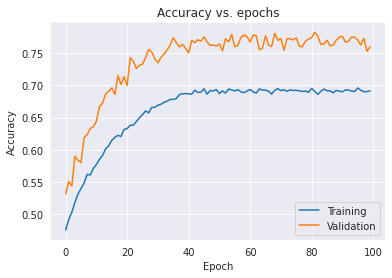

In [84]:
plot_accuracy(history)

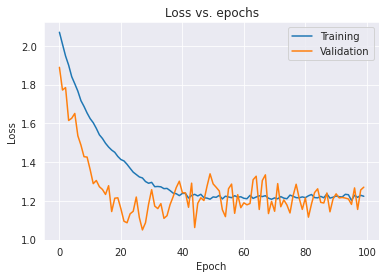

In [85]:
plot_loss(history)

In [94]:
# Get the optimal hyperparameters
best_hps = tuner_bo.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The best parameters are: \n first densely-connected layer is {best_hps.get('dense_1_units')} \n 
the optimal learning rate for the optimizer is {best_hps.get('learning_rate')} 
the dropout unit is {best_hps.get('dropout_1')} 
the momentum us {best_hps.get('momentum')} 
the second densely-connected layer is {best_hps.get('dense_2_units')}
the batch size is {best_hps.get('dense_2_units')}
""")



The hyperparameter search is complete. The best parameters are: 
 first densely-connected layer is 240 
 
the optimal learning rate for the optimizer is 0.0001 
the dropout unit is 0.1 
the momentum us 0.4 
the second densely-connected layer is 128
the batch size is 128

